###Creación de modelo

In [32]:
!pip install tensorflowjs
!pip install --upgrade tensorflow tensorflowjs
!pip install -q scikit-plot

In [33]:
#importan librerias

#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2
import scikitplot as skplt

from glob import glob

#Librerias de modelado
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [34]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path,label, size = (128,128)):
  files = glob(os.path.join(folder_path,"*"))
  X = list(map(plt.imread, files))
  X = [cv2.resize(img,size) for img in X]
  y = [label] * len(X)
  return X,y

In [35]:
image_size = (128,128)

In [36]:
#Cargamos los datos de entrenamiento de la clase 0 y clase 1
X_0, y_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/train/ok_images_train", 1, size = image_size)
X_1, y_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/train/nok_images_train", 0, size = image_size)
X = X_0 + X_1
y = y_0 + y_1
del X_0 , X_1, y_0 , y_1

In [37]:
#Cargamos los datos de validacion de la clase 0 y clase 1
X_validation_0, y_validation_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/validation/ok_images_val", 1, size = image_size)
X_validation_1, y_validation_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/validation/nok_images_val", 0, size = image_size)
X_validation = X_validation_0 + X_validation_1
y_validation = y_validation_0 + y_validation_1
del X_validation_0 , X_validation_1, y_validation_0 , y_validation_1

In [38]:
#Cargamos los datos de test de la clase 0 y clase 1
X_test_0, y_test_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/test/ok_images_test", 1, size = image_size)
X_test_1, y_test_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/test/nok_images_test", 0, size = image_size)
X_test = X_test_0 + X_test_1
y_test = y_test_0 + y_test_1
del X_test_0 , X_test_1, y_test_0 , y_test_1

In [39]:
#codificamos la target
lbl = LabelEncoder()
lbl.fit(y + y_validation + y_test)

LabelEncoder()

In [40]:
y = lbl.transform(y)
y_validation = lbl.transform(y_validation)
y_test = lbl.transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

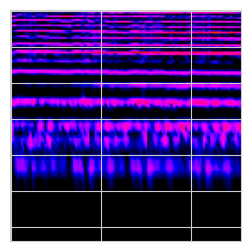

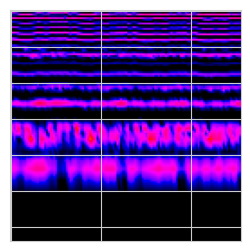

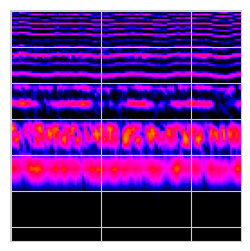

In [41]:
#Vistazo a nuestro dataset
for img in X[:3]:
  plt.figure(figsize = (3,3))
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(img, cmap = "gray")
  plt.show()

In [42]:
X = np.array(X)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

In [43]:
X.shape

(563, 128, 128, 4)

In [44]:
X_train = X
y_train = y

In [45]:
y.shape

(563,)

In [46]:
# Initialize the Sequential model
model = tf.keras.Sequential([
        # Explicit Input layer - this is not typically necessary in Sequential but doing it to clarify the input shape
        tf.keras.layers.InputLayer(input_shape=(128, 128, 4)),

        # First layer - Convolutional and Max Pooling
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second layer - Convolutional and Max Pooling
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Third layer - Convolutional and Max Pooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flattening the output of the convolutional layers
        tf.keras.layers.Flatten(),

        # Fully connected layers
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(16, activation='relu'),

        # Output layer for binary classification
        tf.keras.layers.Dense(1, activation='sigmoid')
          
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to verify the architecture
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 16)   │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,233 (3.16 MB)

 Trainable params: 829,233 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
"""
# Crear el modelo secuencial
model = Sequential()

#Primer capa
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 4)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Segunda capa
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Tercera capa
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Aplanamiento
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))


# Capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))
"""

"\n# Crear el modelo secuencial\nmodel = Sequential()\n\n#Primer capa\nmodel.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 4)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Segunda capa\nmodel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Tercera capa\nmodel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Aplanamiento\nmodel.add(Flatten())\n\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(16, activation='relu'))\n\n\n# Capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria\nmodel.add(Dense(1, activation='sigmoid'))\n"

In [48]:
class_weights = {0: 1.5, 1: 1.0}

# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_validation, y_validation), class_weight=class_weights)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5146 - loss: 0.8644 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5080 - loss: 0.8274 - val_accuracy: 0.6313 - val_loss: 0.6210
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5685 - loss: 0.7831 - val_accuracy: 0.5063 - val_loss: 0.6278
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5479 - loss: 0.7600 - val_accuracy: 0.6500 - val_loss: 0.6084
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6490 - loss: 0.7268 - val_accuracy: 0.6313 - val_loss: 0.5908
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6536 - loss: 0.6879 - val_accuracy: 0.7063 - val_loss: 0.5918
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6595 - loss: 0.7199 - val_accuracy: 0.7000 - val_loss: 0.6382
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6554 - loss: 0.6735 - val_accuracy: 0.7188 - v

#### Gráficas:

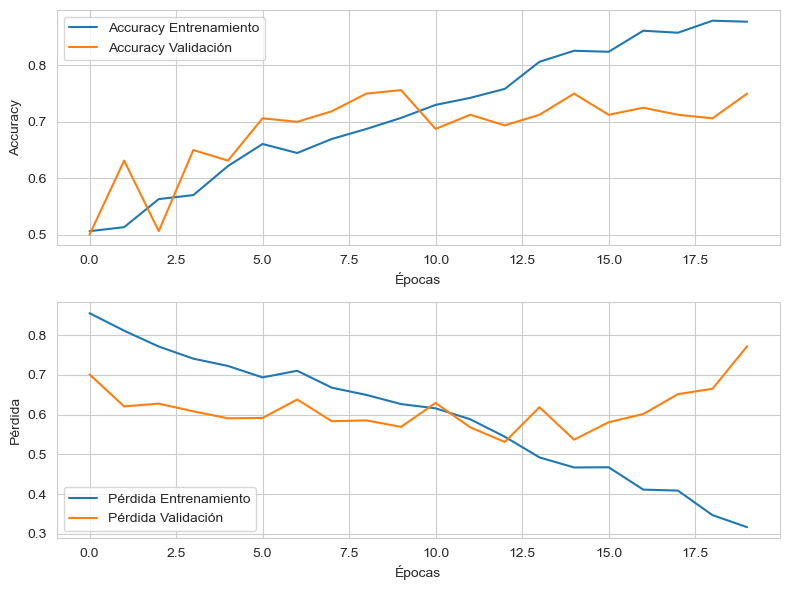

In [49]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [50]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)
y_proba_validation = model.predict(X_validation)
y_pred_validation = y_proba_validation.round().astype(int)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [51]:
lbl = LabelEncoder()
target_names = ['class 1', 'class 0']
#Class 0 = NOK
#Class 1 = OK

In [52]:
print("Train sample \n", classification_report(y_train, y_pred_train, target_names = target_names))
print("Validation sample \n", classification_report(y_validation, y_pred_validation, target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test, target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 1       0.92      0.98      0.95       283
     class 0       0.97      0.92      0.94       280

    accuracy                           0.95       563
   macro avg       0.95      0.95      0.95       563
weighted avg       0.95      0.95      0.95       563

Validation sample 
               precision    recall  f1-score   support

     class 1       0.76      0.72      0.74        80
     class 0       0.74      0.78      0.76        80

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.75      0.75      0.75       160

Test sample 
               precision    recall  f1-score   support

     class 1       0.63      0.65      0.64        40
     class 0       0.64      0.62      0.63        40

    accuracy                           0.64        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.64  

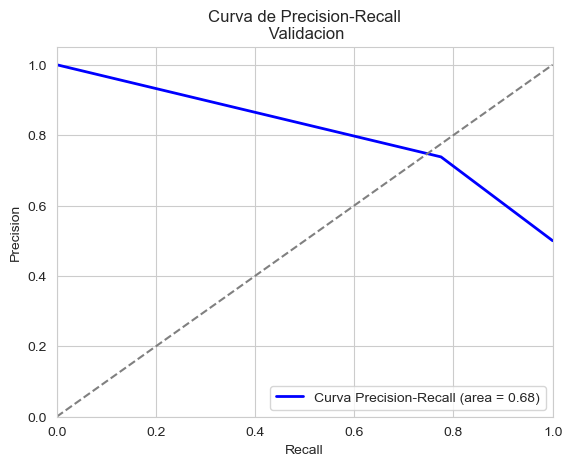

In [53]:
precision, recall, thresholds = precision_recall_curve(y_validation, y_pred_validation)

auc_pr = average_precision_score(y_validation, y_pred_validation)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva Precision-Recall (area = {auc_pr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall\n Validacion')

plt.legend(loc="lower right")
plt.show()

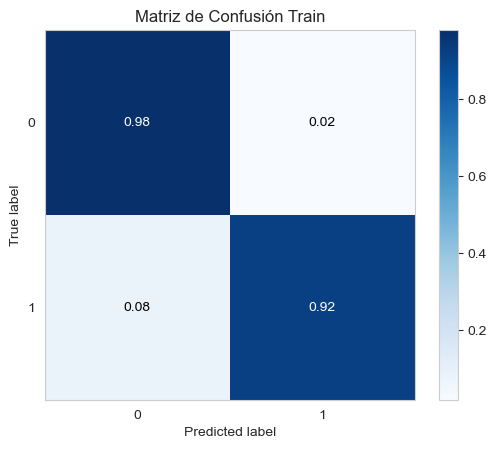

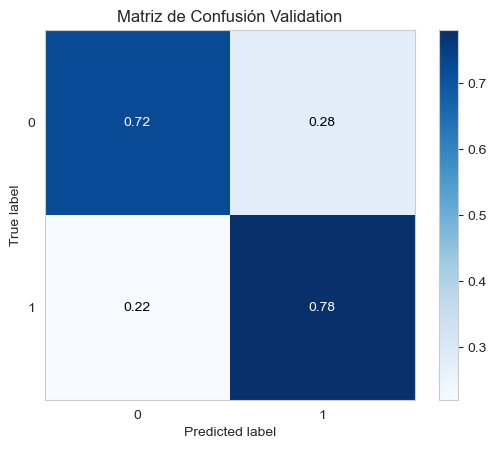

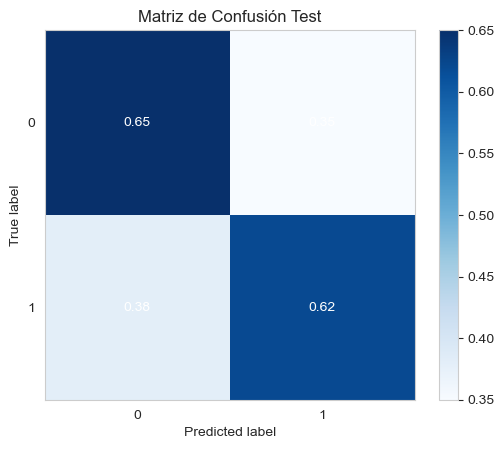

In [54]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_validation, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')


plt.show()

In [55]:
"""fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

skplt.metrics.plot_roc(y_train, np.column_stack((1-y_proba_train, y_proba_train)), ax=axes[0])
axes[0].set_title("Muestra train")

skplt.metrics.plot_roc(y_test, np.column_stack((1-y_proba_test, y_proba_test)), ax=axes[1])
axes[1].set_title("Muestra test")

skplt.metrics.plot_roc(y_validation, np.column_stack((1-y_proba_validation, y_proba_validation)), ax=axes[2])
axes[2].set_title("Muestra validation")
axes[2].legend(loc="lower right")
"""

'fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))\n\nskplt.metrics.plot_roc(y_train, np.column_stack((1-y_proba_train, y_proba_train)), ax=axes[0])\naxes[0].set_title("Muestra train")\n\nskplt.metrics.plot_roc(y_test, np.column_stack((1-y_proba_test, y_proba_test)), ax=axes[1])\naxes[1].set_title("Muestra test")\n\nskplt.metrics.plot_roc(y_validation, np.column_stack((1-y_proba_validation, y_proba_validation)), ax=axes[2])\naxes[2].set_title("Muestra validation")\naxes[2].legend(loc="lower right")\n'

#### Pruebas de modelo (antes de exportar):

In [56]:
input_tensor = model.inputs
print(f"Tensor de entrada: {input_tensor}")

Tensor de entrada: [<KerasTensor shape=(None, 128, 128, 4), dtype=float32, sparse=None, name=keras_tensor_92>]


In [57]:
#Folder of images:
!ls '/Users/manuel/Documents/Python/project_mna/data/images_for_testing'

01.Page81.png 01.Page82.png 01.Page83.png


In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar la imagen
image_path = '/Users/manuel/Documents/Python/project_mna/data/images_for_testing/01.Page83.png'
image = plt.imread(image_path)
size = (128,128)
image = cv2.resize(img,size)

# Convertir la imagen a un array numpy y normalizar los valores de los píxeles
image_array = img_to_array(image)

# Agregar una dimensión extra para convertir la imagen en un lote de un solo elemento
image_array = tf.expand_dims(image_array, axis=0)

# Pasar la imagen al modelo para hacer una predicción
prediction = model.predict(image_array)

print("Value of prediction: ")
print(prediction)

#Give the result:
if(prediction > 0.5):
  print("The image is NOK")
else:
  print("The image is OK")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Value of prediction: 
[[0.68571657]]
The image is NOK


###Exportación del modelo:

In [59]:
import tensorflow as tf
import tensorflowjs as tfjs
import keras

# Print TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow JS version:", tfjs.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
TensorFlow JS version: 4.20.0
Keras version: 3.3.3


In [60]:
!mkdir model

mkdir: model: File exists


In [61]:
tfjs.converters.save_keras_model(model, "model")

failed to lookup keras version from the file,
    this is likely a weight only file
